# Visium HD example

#### Installation

```
uv venv .venv_harpy_vitessce_zarr2 --python=3.12
source .venv_harpy_vitessce_zarr_2/bin/activate
uv pip install "harpy-vitessce[vitessce] @ git+https://github.com/vibspatial/harpy_vitessce.git@main"
```

In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Fetch the example data

In [ ]:
from harpy_vitessce.data_utils import (
    copy_annotations,
    downcast_int64_to_int32,
    example_visium_hd_processing,
    xarray_to_ome_zarr,
)

microns_per_pixel = 0.27376126715315274  # microns per pixel for visium HD

In [ ]:
import os

import harpy as hp
import pooch
from harpy.datasets import get_registry
from spatialdata import read_zarr

BASE_DIR = "/Users/arne.defauw/VIB/DATA/vitessce_data/visium_hd_tutorial/"  # change the base directory

# fetch the data
registry = get_registry()
unzip_path = registry.fetch(
    "transcriptomics/visium_hd/mouse/visium_hd_mouse_small_intestine.zip",
    processor=pooch.Unzip(),
)

# path to a visium experiment
path = os.path.commonpath(unzip_path)

sdata = hp.io.visium_hd(
    path=path,
    bin_size=[16],
    dataset_id="Visium_HD_Mouse_Small_Intestine",
    bins_as_squares=True,
    output=os.path.join(BASE_DIR, "sdata_visium_hd_zarr2.zarr"),
)

sdata = read_zarr(os.path.join(BASE_DIR, "sdata_visium_hd_zarr2.zarr"))

/Users/arne.defauw/VIB/harpy_vitessce/.venv_harpy_vitessce_zarr2/lib/python3.12/site-packages/anndata/_core/anndata.py:1825: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


INFO     The instance_key column in 'table.obs' ('table.obs[location_id]') will be relabeled to ensure a numeric   
         data type, with a continuous range and without including the value 0 (which is reserved for the           
         background). The new labels will be stored in a new column named 'relabeled_location_id'.                 


/Users/arne.defauw/VIB/harpy_vitessce/.venv_harpy_vitessce_zarr2/lib/python3.12/site-packages/spatialdata/_core/spatialdata.py:511: UserWarning: Converting `region_key: region` to categorical dtype.
  convert_region_column_to_categorical(table)


INFO     The Zarr backing store has been changed from None the new file path:                                      
         /Users/arne.defauw/VIB/DATA/vitessce_data/visium_hd_tutorial/sdata_visium_hd_zarr2.zarr                   


version mismatch: detected: RasterFormatV02, requested: FormatV04
/Users/arne.defauw/VIB/harpy_vitessce/.venv_harpy_vitessce_zarr2/lib/python3.12/site-packages/zarr/creation.py:610: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/Users/arne.defauw/VIB/harpy_vitessce/.venv_harpy_vitessce_zarr2/lib/python3.12/site-packages/zarr/creation.py:610: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/Users/arne.defauw/VIB/harpy_vitessce/.venv_harpy_vitessce_zarr2/lib/python3.12/site-packages/zarr/creation.py:610: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/Users/arne.defauw/VIB/harpy_vitessce/.venv_harpy_vitessce_zarr2/lib/python3.12/site-packages/zarr/creation.py:610: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(co

#### Run scanpy pipeline

2026-02-10 09:46:54.661 | INFO     | harpy_vitessce.data_utils._adata:example_visium_hd_processing:220 - Starting Scanpy pipeline for Visium HD data.
2026-02-10 09:46:54.949 | INFO     | harpy_vitessce.data_utils._adata:example_visium_hd_processing:227 - Calculating QC metrics.
2026-02-10 09:47:03.846 | INFO     | harpy_vitessce.data_utils._adata:example_visium_hd_processing:235 - Filtering cells with min_counts=20.


filtered out 143 cells that have less than 20 counts


2026-02-10 09:47:04.155 | INFO     | harpy_vitessce.data_utils._adata:example_visium_hd_processing:238 - Filtering genes with min_cells=10.


filtered out 436 genes that are detected in less than 10 cells


2026-02-10 09:47:04.992 | INFO     | harpy_vitessce.data_utils._adata:example_visium_hd_processing:241 - Shape after filtering: 90890 cells × 18623 genes.
2026-02-10 09:47:04.993 | INFO     | harpy_vitessce.data_utils._adata:example_visium_hd_processing:244 - Normalizing total counts to None per cell.


normalizing counts per cell
    finished (0:00:01)


2026-02-10 09:47:06.634 | INFO     | harpy_vitessce.data_utils._adata:example_visium_hd_processing:247 - Applying log1p transform.
2026-02-10 09:47:06.865 | INFO     | harpy_vitessce.data_utils._adata:example_visium_hd_processing:251 - Selecting highly variable genes with flavor='seurat', n_top_genes=3000.


extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


2026-02-10 09:47:07.605 | INFO     | harpy_vitessce.data_utils._adata:example_visium_hd_processing:258 - Number of HVGs selected: 3000.
2026-02-10 09:47:07.606 | INFO     | harpy_vitessce.data_utils._adata:example_visium_hd_processing:260 - Subsetting AnnData to HVGs in place.
2026-02-10 09:47:07.763 | INFO     | harpy_vitessce.data_utils._adata:example_visium_hd_processing:262 - Shape after HVG subset: 90890 cells × 3000 genes.
2026-02-10 09:47:07.763 | INFO     | harpy_vitessce.data_utils._adata:example_visium_hd_processing:265 - Scaling data with max_value=10.
/Users/arne.defauw/.local/share/uv/python/cpython-3.12.12-macos-aarch64-none/lib/python3.12/functools.py:912: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)
2026-02-10 09:47:08.818 | INFO     | harpy_vitessce.data_utils._adata:example_visium_hd_processing:269 - Running PCA with n_comps=50, svd_solver='arpack'.


computing PCA
    with n_comps=50
    finished (0:01:40)


2026-02-10 09:48:49.259 | INFO     | harpy_vitessce.data_utils._adata:example_visium_hd_processing:275 - Computing neighborhood graph (n_neighbors=15, n_pcs=30).


computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:22)


2026-02-10 09:49:11.728 | INFO     | harpy_vitessce.data_utils._adata:example_visium_hd_processing:281 - Computing UMAP embedding.


computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:41)


2026-02-10 09:49:53.208 | INFO     | harpy_vitessce.data_utils._adata:example_visium_hd_processing:285 - Running Leiden clustering with resolution=0.8, key_added='leiden'.


running Leiden clustering
    finished: found 19 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:02:11)


2026-02-10 09:52:06.614 | INFO     | harpy_vitessce.data_utils._adata:example_visium_hd_processing:291 - Leiden clustering finished.
2026-02-10 09:52:06.615 | INFO     | harpy_vitessce.data_utils._adata:example_visium_hd_processing:292 - Number of Leiden clusters: 19
2026-02-10 09:52:06.615 | INFO     | harpy_vitessce.data_utils._adata:example_visium_hd_processing:295 - Plotting UMAP colored by Leiden clusters.


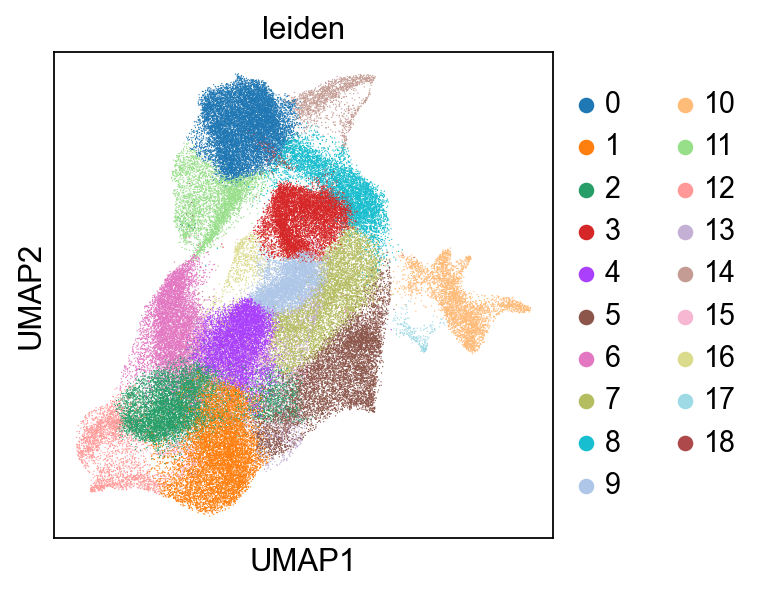

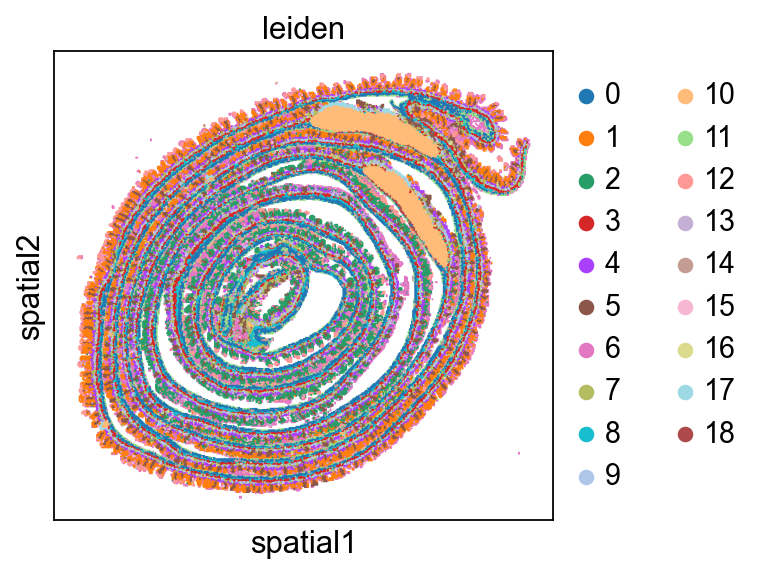

2026-02-10 09:52:10.295 | INFO     | harpy_vitessce.data_utils._adata:example_visium_hd_processing:301 - Scanpy preprocessing and clustering pipeline completed.


In [ ]:
adata = sdata["square_016um"].copy()
# takes around 2 minutes
adata = example_visium_hd_processing(
    adata,
    spatial_spot_size=100,  # for visualization
    min_counts=20,
    target_sum=None,
)

In [ ]:
# copy the annotation from the preprocessed adata to the adata with the raw counts (we want to visualize these)

adata_annotated = copy_annotations(
    src=adata,
    tgt=sdata["square_016um"],
    obs_keys=["leiden", "total_counts", "n_genes_by_counts"],
    obsm_keys=["X_umap"],
)
# vitessce can not work with int64
_df, _, _ = downcast_int64_to_int32(
    adata_annotated.obs,
    strict=True,
)
adata_annotated.obs = _df

#### Write AnnData to zarr

In [ ]:
import os

import anndata as ad

ad.settings.zarr_write_format = (
    2  # need to write to be able to be compatible with vitessce
)

VAR_CHUNK_SIZE = 10

output_path_adata = os.path.join(BASE_DIR, "adata.zarr")
output_path_img = os.path.join(BASE_DIR, "image.ome.zarr")

adata_annotated.obsm["spatial"] = adata_annotated.obsm["spatial"] * microns_per_pixel

adata_annotated.write_zarr(output_path_adata, chunks=[adata.shape[0], VAR_CHUNK_SIZE])

/Users/arne.defauw/VIB/harpy_vitessce/.venv_harpy_vitessce_zarr2/lib/python3.12/site-packages/anndata/_io/zarr.py:44: UserWarning: Writing zarr v2 data will no longer be the default in the next minor release. v3 data will be written by default. If you are explicitly setting this configuration, consider migrating to the zarr v3 file format.
  f = open_write_group(store)


#### Write DataTree to OME-Zarr

In [ ]:
xarray_to_ome_zarr(
    tree_or_da=sdata["Visium_HD_Mouse_Small_Intestine_full_image"],
    channel_names=["r", "g", "b"],
    output_path=output_path_img,
    channel_colors={
        "r": "FF0000",
        "g": "00FF00",
        "b": "0000FF",
    },
    microns_per_pixel=microns_per_pixel,
    coords_in_microns=False,
    zarr_format=2,  # vitessce only supports zarr 2, so we write to zarr 2
)

#### Create Vitessce config

In [ ]:
import numpy as np
from anndata import read_zarr

adata = read_zarr(output_path_adata)

# get the center of the tissue
xy = adata.obsm["spatial"]
center_x = float(np.mean(xy[:, 0]))
center_y = float(np.mean(xy[:, 1]))

In [ ]:
from harpy_vitessce.vitessce_config import visium_hd as visium_hd_vitessce

vc = visium_hd_vitessce(
    img_source=os.path.basename(output_path_img),
    adata_source=os.path.basename(output_path_adata),
    name="Example",
    base_dir=BASE_DIR,
    center=(center_x, center_y),
    zoom=-3.2,
    emb_radius_mode="auto",
    cluster_key="leiden",
    embedding_key="X_umap",
    qc_obs_feature_keys=["total_counts"],
)

In [ ]:
from IPython.display import HTML, display

url = vc.web_app()
display(HTML(f'<a href="{url}" target="_blank">Open in Vitessce</a>'))